In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def add_gaussian_noise(image, mean=0.0, sigma=0.15):
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian_noise
    return np.clip(noisy_image, 0, 1)

In [ ]:
def add_salt_and_pepper_noise(image, salt_pepper_ratio=0.5, amount=0.20):
    noisy_image = np.copy(image)
    num_salt = np.ceil(amount * image.size * salt_pepper_ratio)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 1

    num_pepper = np.ceil(amount* image.size * (1. - salt_pepper_ratio))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0
    return noisy_image


In [ ]:
def add_rayleigh_noise(image, scale=0.25):
    rayleigh_noise = np.random.rayleigh(scale, image.shape)
    noisy_image = image + rayleigh_noise
    return np.clip(noisy_image, 0, 1)

In [ ]:
def add_poisson_noise(image):
    vals = len(np.unique(image))
    vals = 2 ** np.ceil(np.log2(vals))
    noisy_image = np.random.poisson(image * vals) / float(vals)
    return noisy_image

In [ ]:
def plot_image_and_histogram(image, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(image, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title)
    ax2.hist(image.ravel(), bins=256, range=[0, 1], fc='k', ec='k')
    ax2.set_title('Histogram')

In [ ]:

gray_image = np.random.rand(256, 256)

image_path1 = '/content/image1.jpg'
image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)

gray_image1 = image1 / 255.0

image_path2 = '/content/image2.jpg'
image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

gray_image2 = image2 / 255.0

image_path3 = '/content/image3.jpg'
image3 = cv2.imread(image_path3, cv2.IMREAD_GRAYSCALE)

gray_image3 = image3 / 255.0

gaussian_noise_img1 = add_gaussian_noise(gray_image1)
gaussian_noise_img2 = add_gaussian_noise(gray_image2)
gaussian_noise_img3 = add_gaussian_noise(gray_image3)



salt_pepper_noise_img1 = add_salt_and_pepper_noise(gray_image1)
salt_pepper_noise_img2 = add_salt_and_pepper_noise(gray_image2)
salt_pepper_noise_img3 = add_salt_and_pepper_noise(gray_image3)


rayleigh_noise_img1 = add_rayleigh_noise(gray_image1)
rayleigh_noise_img2 = add_rayleigh_noise(gray_image2)
rayleigh_noise_img3 = add_rayleigh_noise(gray_image3)


poisson_noise_img1 = add_poisson_noise(gray_image1)
poisson_noise_img2 = add_poisson_noise(gray_image2)
poisson_noise_img3 = add_poisson_noise(gray_image3)

In [ ]:
plot_image_and_histogram(gaussian_noise_img1, 'Gaussian Noise')
plot_image_and_histogram(gaussian_noise_img2, 'Gaussian Noise')
plot_image_and_histogram(gaussian_noise_img3, 'Gaussian Noise')

plot_image_and_histogram(salt_pepper_noise_img1, 'Salt and Pepper Noise')
plot_image_and_histogram(salt_pepper_noise_img2, 'Salt and Pepper Noise')
plot_image_and_histogram(salt_pepper_noise_img3, 'Salt and Pepper Noise')


plot_image_and_histogram(rayleigh_noise_img1, 'Rayleigh Noise')
plot_image_and_histogram(rayleigh_noise_img2, 'Rayleigh Noise')
plot_image_and_histogram(rayleigh_noise_img3, 'Rayleigh Noise')

plot_image_and_histogram(poisson_noise_img1, 'Poisson Noise')
plot_image_and_histogram(poisson_noise_img2, 'Poisson Noise')
plot_image_and_histogram(poisson_noise_img3, 'Poisson Noise')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def estimate_noise(I):
    H, W = I.shape
    M = [[1, -2, 1], [-2, 4, -2], [1, -2, 1]]
    sigma = np.sum(np.sum(np.absolute(cv2.filter2D(I, -1, np.array(M)))))
    sigma = sigma * np.sqrt(0.5 * np.pi) / (6 * (W-2) * (H-2))
    return sigma


In [ ]:

image_path = '/content/image1 gaussian.png'
noised_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
start_y, start_x = 10, 10
end_y, end_x = 60, 60


In [ ]:

snapshot = noised_image[start_y:end_y, start_x:end_x]

In [ ]:

sigma_estimated = estimate_noise(snapshot)
print(f"Estimated Gaussian noise standard deviation for the snapshot: {sigma_estimated}")

Estimated Gaussian noise standard deviation for the snapshot: 8.383623523705266


In [ ]:
image_path = '/content/image1 gaussian.png'
noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if noisy_image is None:
    raise ValueError("Image not found or path is incorrect")

In [ ]:

def apply_median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

In [ ]:

def apply_alpha_trimmed_mean_filter(image, kernel_size, d):
    pad_width = kernel_size // 2
    padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
    new_image = np.zeros(image.shape, dtype=image.dtype)

    trim_amount = d // 2

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            window = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            window.sort()

            trimmed = window[trim_amount:-trim_amount]

            new_image[i, j] = np.mean(trimmed) if len(trimmed) > 0 else 0

    return new_image


In [ ]:

kernel_size_median = 3
kernel_size_alpha_trimmed = 5
d_alpha_trimmed = int((kernel_size_alpha_trimmed ** 2) * 0.1)  # Trimming 10%

In [ ]:

median_filtered_image = apply_median_filter(noisy_image, kernel_size_median)
alpha_trimmed_filtered_image = apply_alpha_trimmed_mean_filter(noisy_image, kernel_size_alpha_trimmed, d_alpha_trimmed)

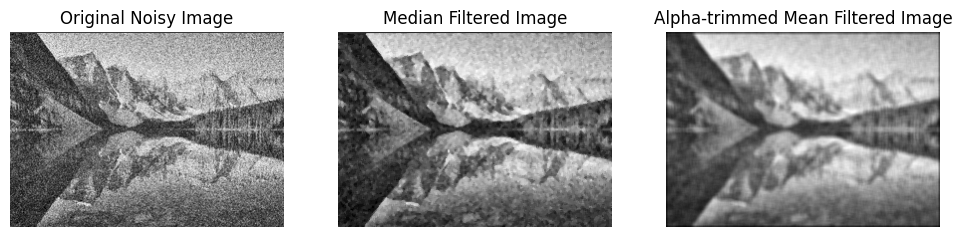

In [ ]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(alpha_trimmed_filtered_image, cmap='gray')
plt.title('Alpha-trimmed Mean Filtered Image')
plt.axis('off')

plt.show()

In [ ]:
def apply_max_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.dilate(image, kernel)

In [ ]:

def apply_min_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(image, kernel)

In [ ]:

def apply_weighted_median_filter(image, kernel_size, weights):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            weighted_neighborhood = np.repeat(neighborhood, weights)
            filtered_image[i, j] = np.median(weighted_neighborhood)

    return filtered_image

In [ ]:

def apply_midpoint_filter(image, kernel_size):
    max_filtered = cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))
    min_filtered = cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))
    return ((max_filtered.astype(np.int32) + min_filtered.astype(np.int32)) // 2).astype(np.uint8)


In [ ]:
kernel_size = 3
weights = [1] * (kernel_size**2)

max_filtered_image = apply_max_filter(noisy_image, kernel_size)
min_filtered_image = apply_min_filter(noisy_image, kernel_size)
weighted_median_filtered_image = apply_weighted_median_filter(noisy_image, kernel_size, weights)
midpoint_filtered_image = apply_midpoint_filter(noisy_image, kernel_size)

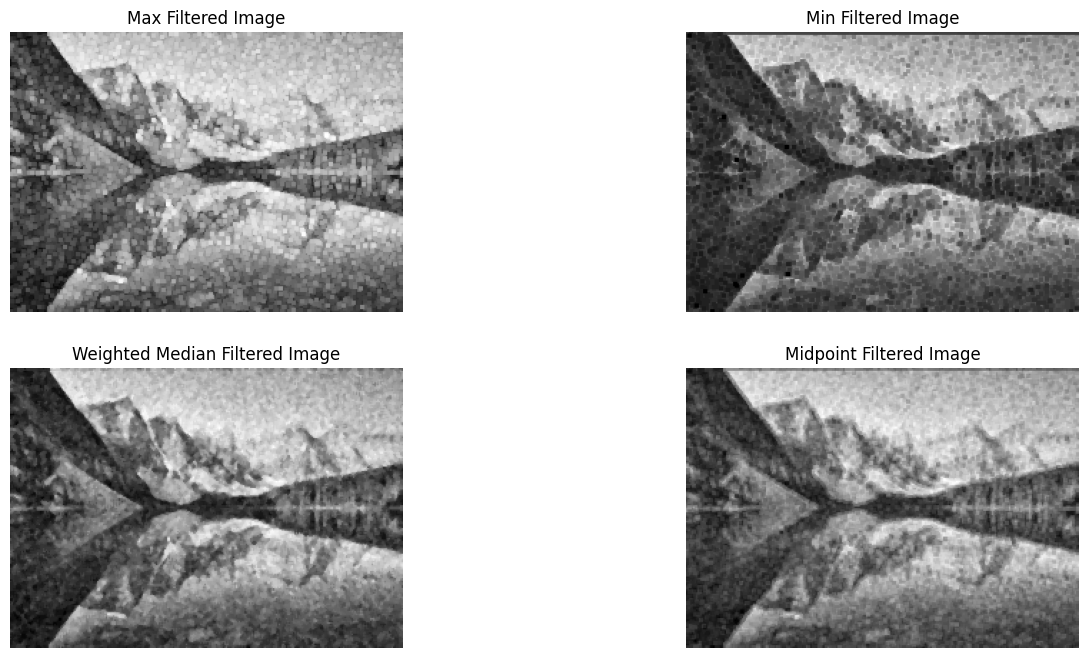

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.imshow(max_filtered_image, cmap='gray')
plt.title('Max Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(min_filtered_image, cmap='gray')
plt.title('Min Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(weighted_median_filtered_image, cmap='gray')
plt.title('Weighted Median Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(midpoint_filtered_image, cmap='gray')
plt.title('Midpoint Filtered Image')
plt.axis('off')

plt.show()

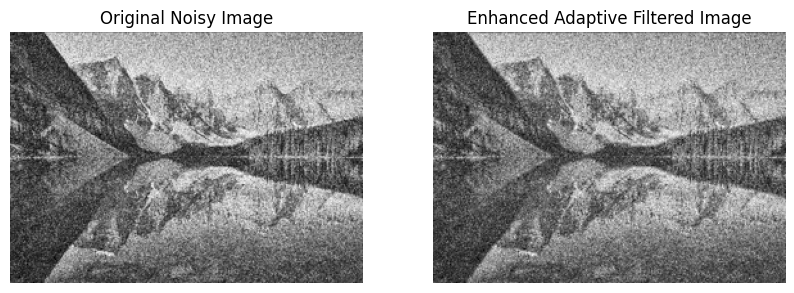

In [ ]:
def adaptive_local_noise_reduction_filter_enhanced(image, kernel_size, global_variance=None):

    if global_variance is None:
        global_variance = np.var(image)

    pad_width = kernel_size // 2
    padded_image = np.pad(image, pad_width, mode='reflect')
    filtered_image = np.zeros(image.shape, dtype=np.float32)

    for i in range(pad_width, padded_image.shape[0] - pad_width):
        for j in range(pad_width, padded_image.shape[1] - pad_width):
            local_window = padded_image[i-pad_width:i+pad_width+1, j-pad_width:j+pad_width+1]
            local_mean = np.mean(local_window)
            local_median = np.median(local_window)
            local_variance = np.var(local_window)

            if local_variance == 0:
                filtered_image[i-pad_width, j-pad_width] = image[i-pad_width, j-pad_width]
            else:
                noise_variance_ratio = min(global_variance / local_variance, 1)
                filtered_image[i-pad_width, j-pad_width] = local_mean + noise_variance_ratio * (image[i-pad_width, j-pad_width] - local_median)

    # Scale the output to match the scale of the original image to prevent darkening
    filtered_image = cv2.normalize(filtered_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    return filtered_image.astype(np.uint8)

enhanced_adaptive_filtered_image = adaptive_local_noise_reduction_filter_enhanced(noisy_image, kernel_size)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_adaptive_filtered_image, cmap='gray')
plt.title('Enhanced Adaptive Filtered Image')
plt.axis('off')

plt.show()

In [ ]:
def apply_weighted_mean_filter(image, kernel_size):

    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    return cv2.filter2D(image, -1, kernel)

def sharpen_image_with_all_filters(image, kernel_size):
    sharpened_images = {}

    # Function to apply the sharpening
    def apply_sharpening(smoothed_image, alpha=1.5, beta=-0.5):
        return cv2.addWeighted(image, alpha, smoothed_image, beta, 0)

    sharpened_images['median'] = apply_sharpening(cv2.medianBlur(image, kernel_size))

    max_filtered = cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))
    sharpened_images['maximum'] = apply_sharpening(max_filtered)

    min_filtered = cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))
    sharpened_images['minimum'] = apply_sharpening(min_filtered)

    weighted_mean_filtered = apply_weighted_mean_filter(image, kernel_size)
    sharpened_images['weighted_mean'] = apply_sharpening(weighted_mean_filtered)

    midpoint = ((max_filtered.astype(np.float64) + min_filtered.astype(np.float64)) / 2).astype(np.uint8)
    sharpened_images['midpoint'] = apply_sharpening(midpoint)

    return sharpened_images

kernel_size = 5  # Kernel size for the filters
sharpened_images = sharpen_image_with_all_filters(noisy_image, kernel_size)

plt.figure(figsize=(20, 12))
for i, (filter_name, image) in enumerate(sharpened_images.items(), 1):
    plt.subplot(2, 3, i)
    plt.imshow(image, cmap='gray')
    plt.title(f'{filter_name.capitalize()} Filter Sharpening')
    plt.axis('off')
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.